In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
%matplotlib inline

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [2]:
df_train = pd.read_csv('train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Handle missing data

In [3]:
df_null = df_train.isnull().sum()
#print (len(df_null))
df1 = pd.DataFrame()
for idx_num in range(len(df_null)):
    if df_null.values[idx_num] != 0:
        df_temp = pd.DataFrame(index = [df_null.index[idx_num]],data = [df_null.values[idx_num]])
        df1 = df1.append(df_temp)
print (df1)

                 0
LotFrontage    259
Alley         1369
MasVnrType       8
MasVnrArea       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
FireplaceQu    690
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
PoolQC        1453
Fence         1179
MiscFeature   1406


In [4]:
# handle the missing data
# Alley : NA means no alley, so change it to 'None'
df_train.loc[:,'Alley'] = df_train.loc[:,'Alley'].fillna('None')
# FireplaceQu : NA means no Fireplace
df_train.loc[:,'FireplaceQu'] = df_train.loc[:,'FireplaceQu'].fillna('None')
# PoolQC : NA means no pool
df_train.loc[:,'PoolQC'] = df_train.loc[:,'PoolQC'].fillna('None')
# Fence : NA means no fence
df_train.loc[:,'Fence'] = df_train.loc[:,'Fence'].fillna('None')
# MiscFeature : NA means no feature, and its MiscVal should be 0
df_train.loc[:,'MiscFeature'] = df_train.loc[:,'MiscFeature'].fillna('None')
## LotFrontage : make it 0 first
df_train.loc[:,'LotFrontage'] = df_train.loc[:,'LotFrontage'].fillna(0)
## MasVnrType : NaN most likely to be None, make it None first
df_train.loc[:,'MasVnrType'] = df_train.loc[:,'MasVnrType'].fillna('None')
## MasVnrArea : NaN is the same with MasVnrType, make it 0 first
df_train.loc[:,'MasVnrArea'] = df_train.loc[:,'MasVnrArea'].fillna(0)
# BsmtQual : NA means no basement 
df_train.loc[:,'BsmtQual'] = df_train.loc[:,'BsmtQual'].fillna('None')
# BsmtCond : NA means no basement
df_train.loc[:,'BsmtCond'] = df_train.loc[:,'BsmtCond'].fillna('None')
# BsmtExposure : NA means no basement, but index 948 is strange, based on other data with unfinished basement, the Nan is mostly 'No'
df_train.loc[948,'BsmtExposure'] = 'No'
df_train.loc[:,'BsmtExposure'] = df_train.loc[:,'BsmtExposure'].fillna('None')
# BsmtFinType1 : NA means no basement
df_train.loc[:,'BsmtFinType1'] = df_train.loc[:,'BsmtFinType1'].fillna('None')
# BsmtFinType2 : NA means no basement
df_train.loc[:,'BsmtFinType2'] = df_train.loc[:,'BsmtFinType2'].fillna('None')
# Electrical : only one NA, and hard to interpret, just drop the data
df_train = df_train[df_train['Electrical'].notnull()]
# GarageType, GarageYrBlt,GarageFinish,GarageQual,GarageCond : NA means no garage
df_train.loc[:,'GarageType'] = df_train.loc[:,'GarageType'].fillna('None')
df_train.loc[:,'GarageFinish'] = df_train.loc[:,'GarageFinish'].fillna('None')
df_train.loc[:,'GarageQual'] = df_train.loc[:,'GarageQual'].fillna('None')
df_train.loc[:,'GarageCond'] = df_train.loc[:,'GarageCond'].fillna('None')
## Tansfer GarageYrBlt later, fill in 0 first, then deal with it 
df_train.loc[:,'GarageYrBlt'] = df_train.loc[:,'GarageYrBlt'].fillna(0)

In [5]:
# handle categorical like feature value

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

def apply_label_encoder(data,feature_name):
    le.fit(df_train[feature_name])
    data[feature_name] = le.transform(data[feature_name])

labelEncoder_list = ['MSSubClass','MSZoning','Street','Alley','LandContour','LotConfig','Neighborhood','Condition1',
'Condition2','BldgType','HouseStyle','YearBuilt','YearRemodAdd','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea',
'Foundation','BsmtFinSF1','Heating','CentralAir','Electrical','GarageYrBlt','Fence','MiscFeature','MoSold','YrSold','SaleType','SaleCondition']
for feature in labelEncoder_list:
    apply_label_encoder(df_train,feature)


def apply_qualify_encoder(data,feature_name):
    return data.replace({feature_name:{"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5}})

qual_labelEncoder_list = ['ExterCond','ExterQual','HeatingQC','KitchenQual','BsmtQual','BsmtCond','FireplaceQu','GarageCond','GarageQual','PoolQC']    
for feature in qual_labelEncoder_list:
    df_train = apply_qualify_encoder(df_train,feature)
    
#special ones
df_train = df_train.replace({"BsmtExposure" : {"None" : 0,"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                  "BsmtFinType1" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
                  "BsmtFinType2" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
                  "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                  "Min2" : 6, "Min1" : 7, "Typ" : 8},
                  "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                  "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                  "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                  "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4},
                  "GarageFinish": {"None" : 0, "Unf":1, "RFn":2,"Fin":3},
                  "GarageType" : {"None":0, "Detchd":1, "CarPort":2, "BuiltIn":3, "Basment":4, "Attchd":5,"2Types":6}})

In [6]:
# drop 'Id', it is no relationship with SalePrice
df_train = df_train.drop('Id',axis=1)

## Correlation

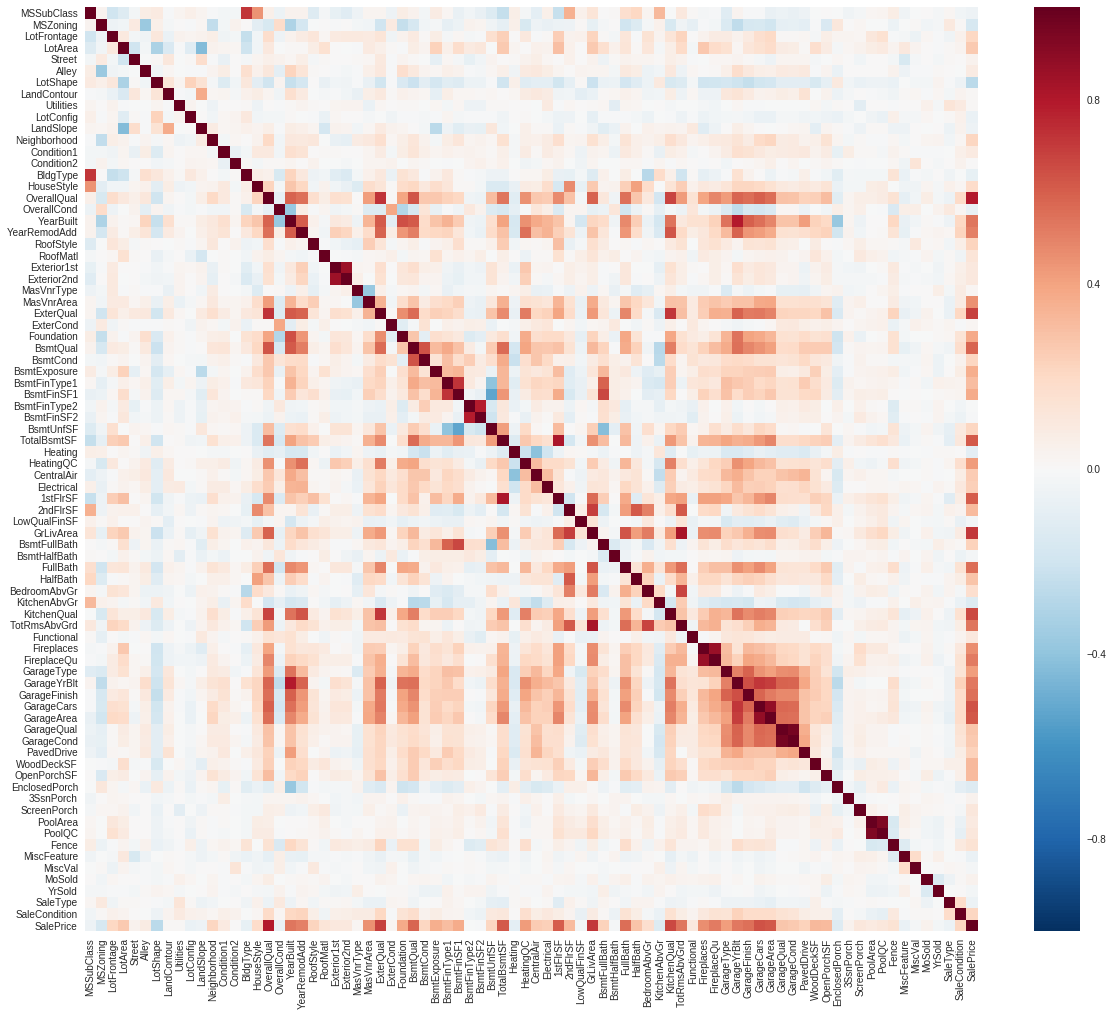

In [7]:
corrmat = df_train.corr()
f,ax = plt.subplots(figsize=(20,17))
sns.heatmap(corrmat)

In [8]:
corrmat.nlargest(len(df_train),'SalePrice')['SalePrice']

SalePrice        1.000000
OverallQual      0.791069
GrLivArea        0.708618
ExterQual        0.682677
KitchenQual      0.659814
GarageCars       0.640473
GarageArea       0.623423
TotalBsmtSF      0.613905
1stFlrSF         0.605968
BsmtQual         0.585349
FullBath         0.560881
GarageFinish     0.549809
YearBuilt        0.535346
TotRmsAbvGrd     0.533779
GarageYrBlt      0.527901
FireplaceQu      0.520507
YearRemodAdd     0.507430
Fireplaces       0.466968
MasVnrArea       0.458195
HeatingQC        0.427639
GarageType       0.415266
Foundation       0.382671
BsmtFinSF1       0.368806
BsmtExposure     0.361843
WoodDeckSF       0.324422
2ndFlrSF         0.319464
OpenPorchSF      0.315831
BsmtFinType1     0.304923
HalfBath         0.284400
GarageQual       0.273879
                   ...   
Exterior1st      0.103658
PoolArea         0.092397
Condition1       0.091152
Alley            0.083125
MoSold           0.046380
3SsnPorch        0.044571
Street           0.041043
ExterCond   

## Outlier 

In [9]:
def data_observation(X_feature,y_feature):
    plt.scatter(df_train[X_feature], df_train[y_feature], c = "blue", marker = "s")
    plt.title("Observation of X and SalePrice")
    plt.xlabel(X_feature)
    plt.ylabel(y_feature)
    plt.show()

### Detect Qutlier

In [10]:
# for i in df_train.columns:
#     if i != 'SalePrice':
#         data_observation(i,'SalePrice')

In [11]:
# remove outliers
df_train[(df_train['LotFrontage']>250)]
df_train = df_train.drop([934,1298])
df_train[(df_train['MasVnrArea']<50)&(df_train['SalePrice']>700000)]
df_train = df_train.drop([1182])
df_train[(df_train['BsmtFinSF1']>50)&(df_train['SalePrice']>500000)].loc[:,'BsmtFinSF1']
df_train = df_train.drop([1046])
# df_train[(df_train['GrLivArea']>5000)]
# df_train = df_train.drop([1298])
df_train[(df_train['GarageYrBlt']>60)&(df_train['SalePrice']>620000)]
df_train = df_train.drop([691,1169])
df_train[(df_train['OpenPorchSF']>500)&(df_train['SalePrice']<100000)]
df_train = df_train.drop([495])
df_train[(df_train['YearBuilt']>80) & (df_train['SalePrice']>600000)]
df_train = df_train.drop([898])
df_train[(df_train['YearBuilt']<20) & (df_train['SalePrice']>400000)]
df_train = df_train.drop([185])
# df_train[(df_train['TotalBsmtSF']>5000)]
# df_train = df_train.drop([1298])
df_train[(df_train['1stFlrSF']>2700)]
df_train = df_train.drop([496,523,1024])

## Feature Selection and Transformation

### Observe the data again

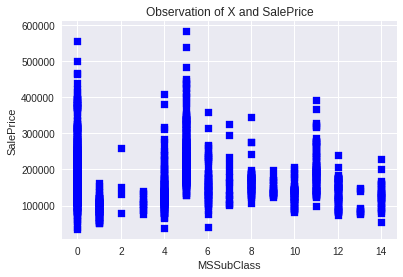

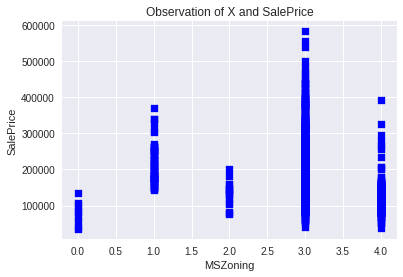

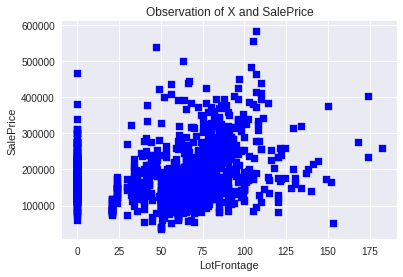

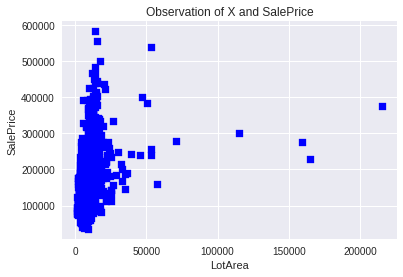

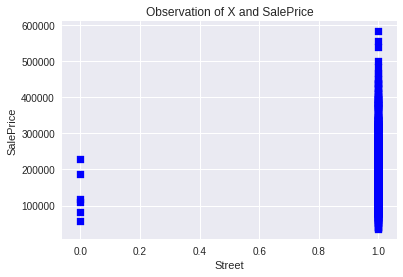

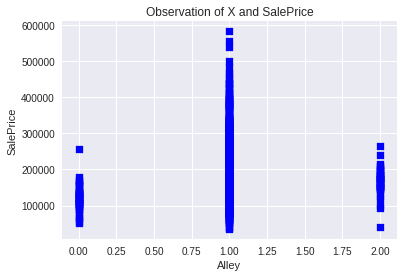

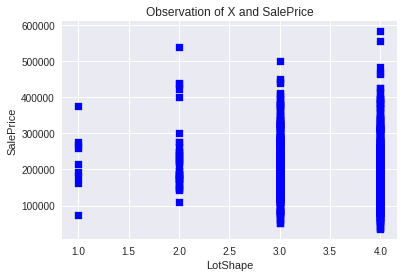

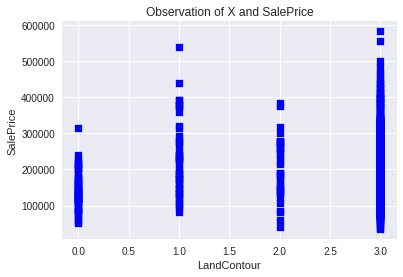

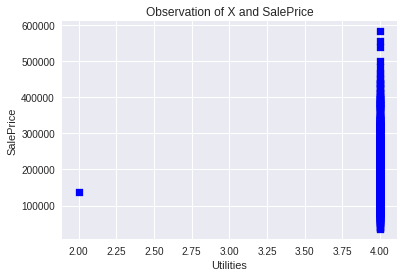

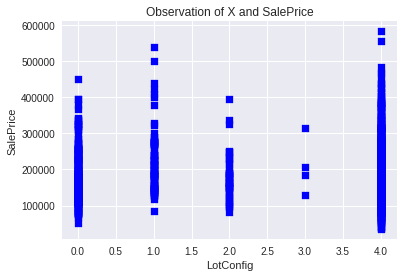

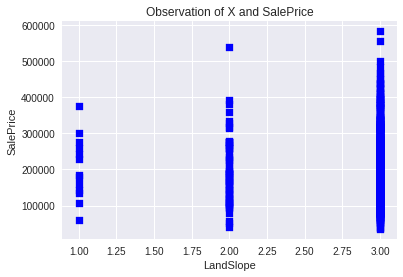

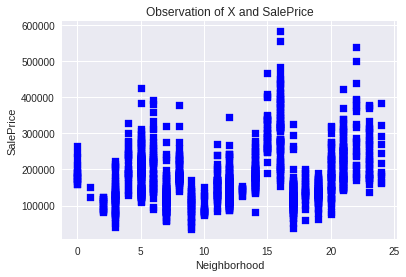

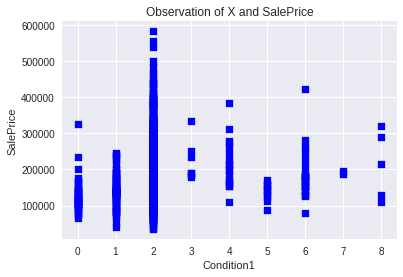

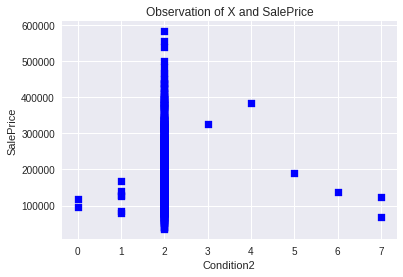

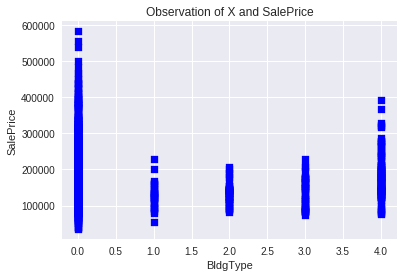

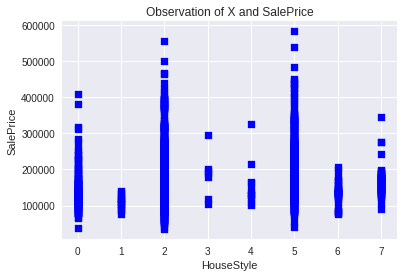

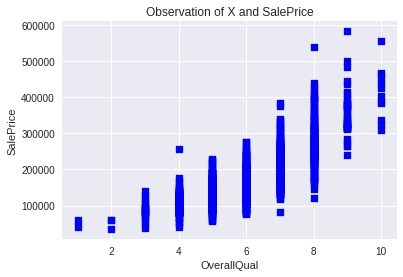

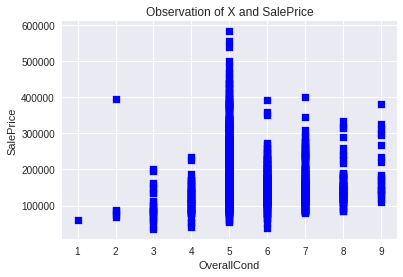

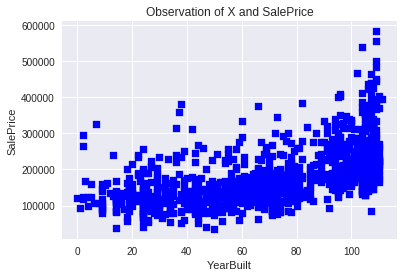

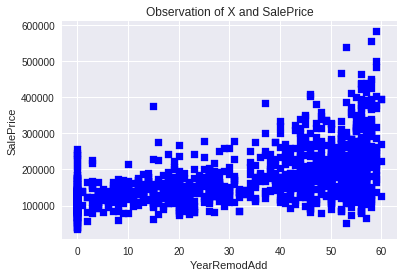

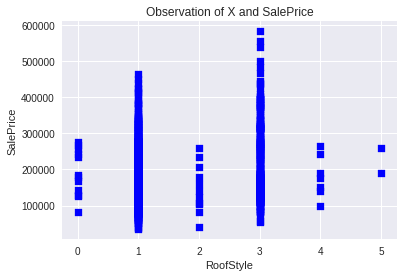

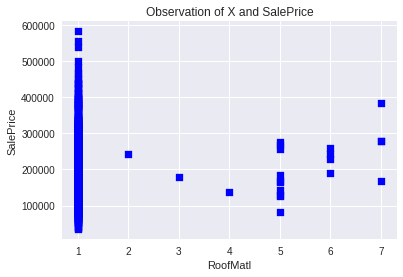

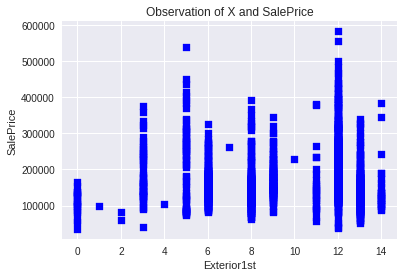

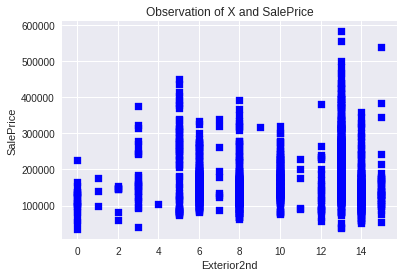

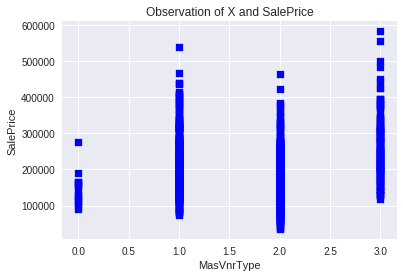

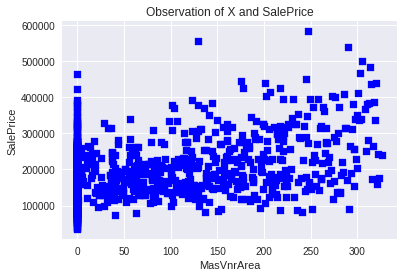

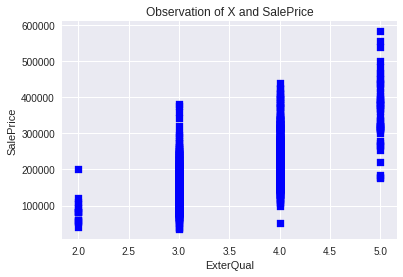

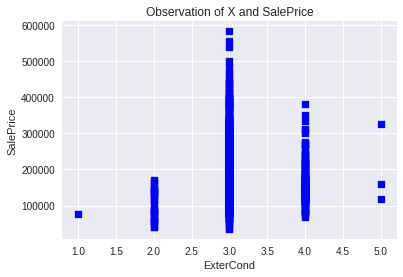

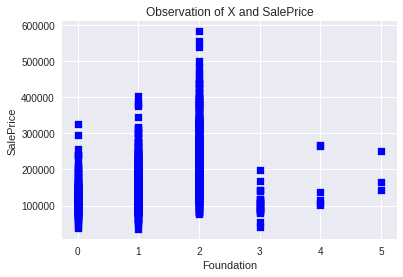

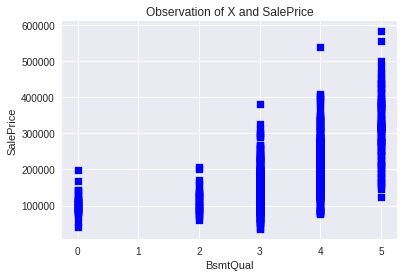

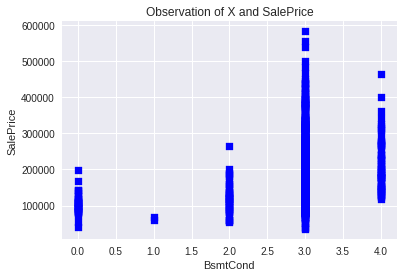

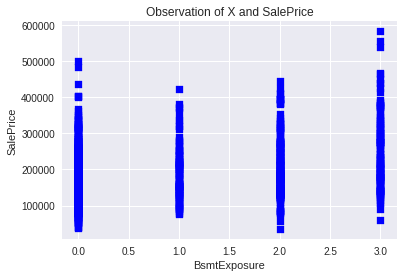

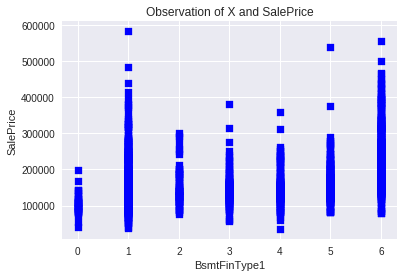

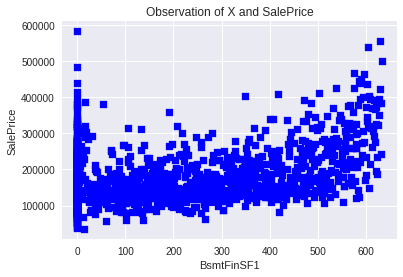

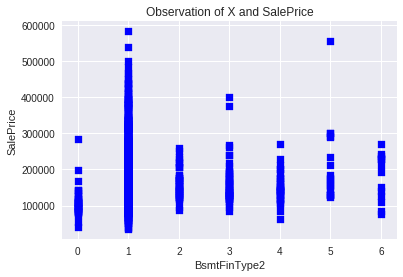

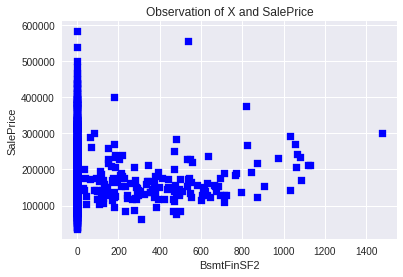

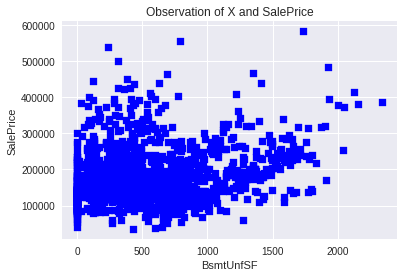

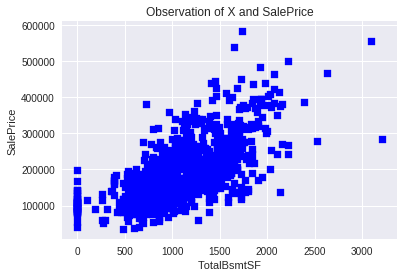

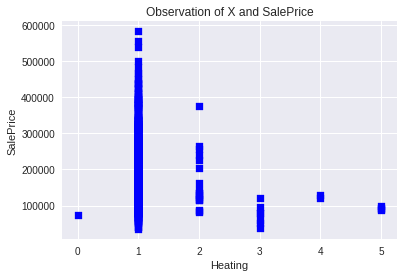

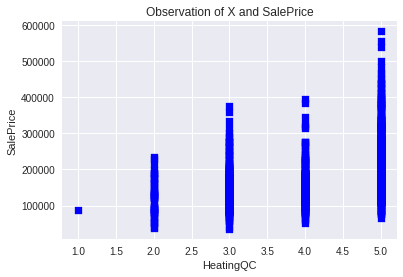

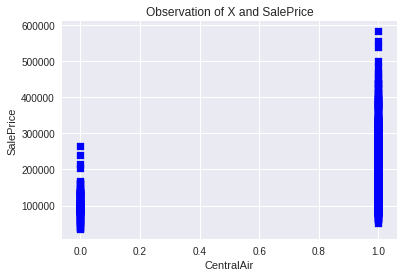

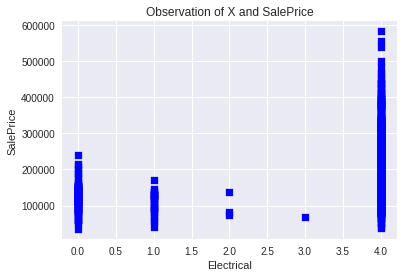

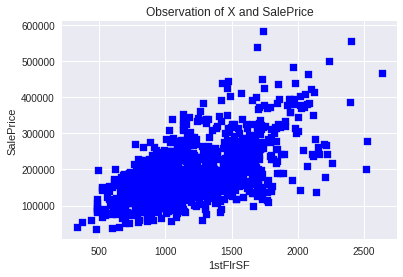

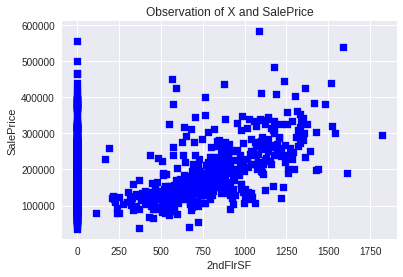

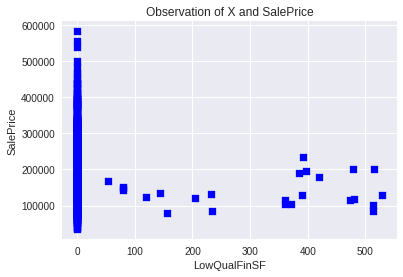

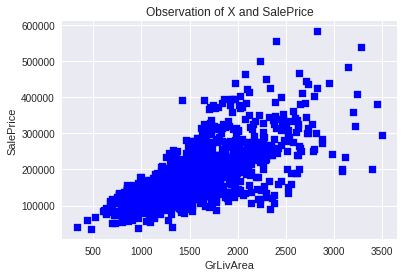

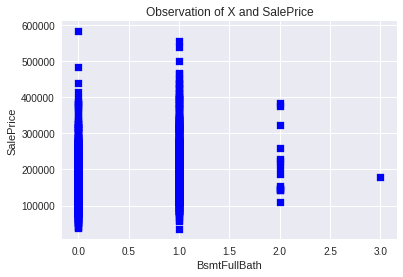

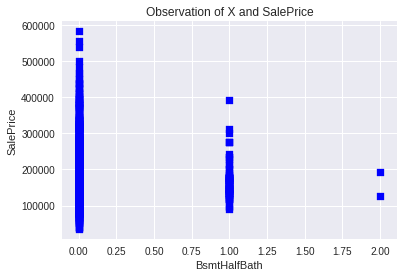

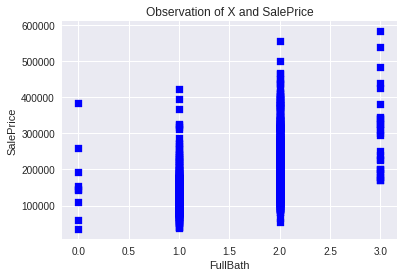

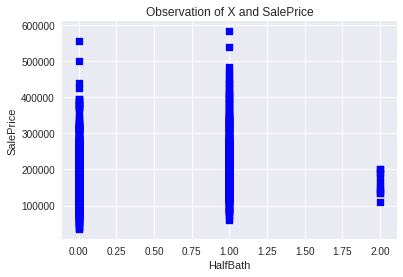

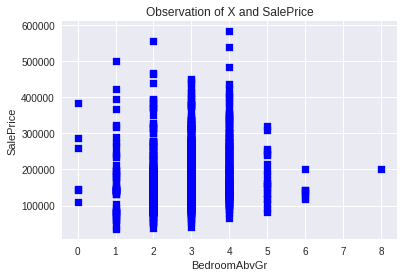

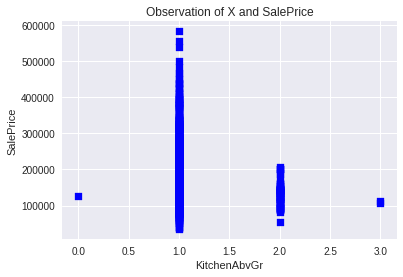

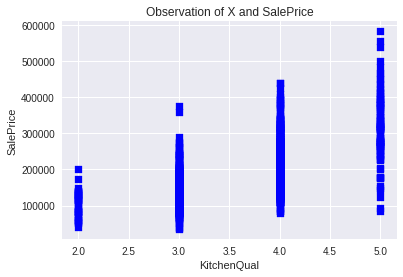

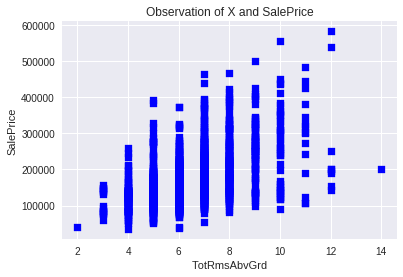

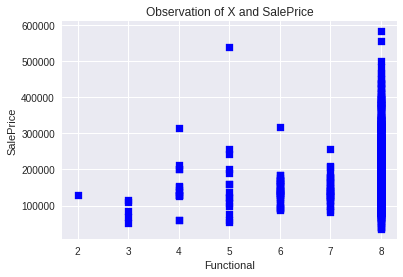

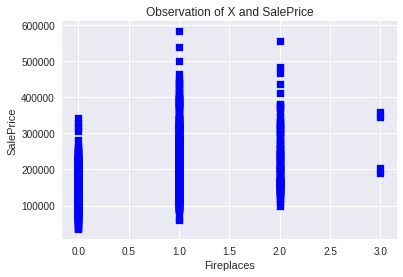

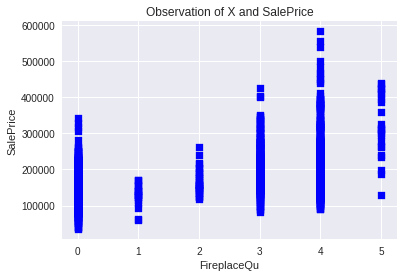

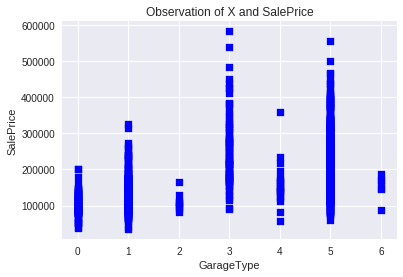

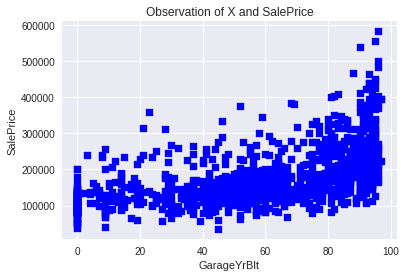

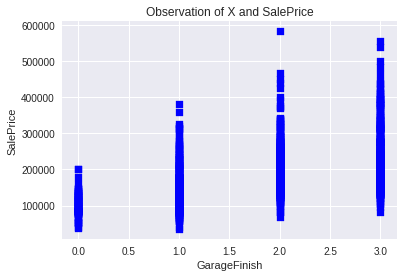

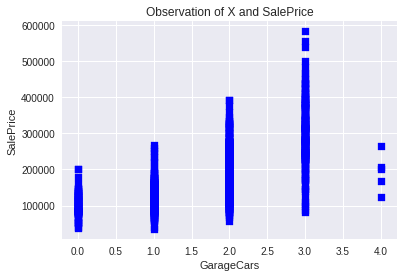

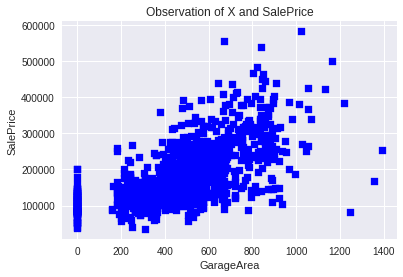

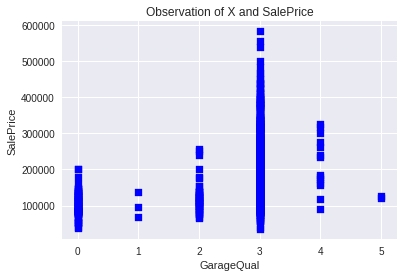

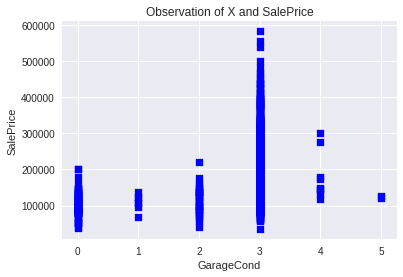

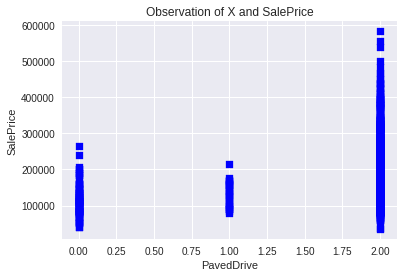

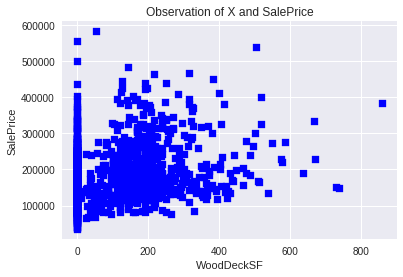

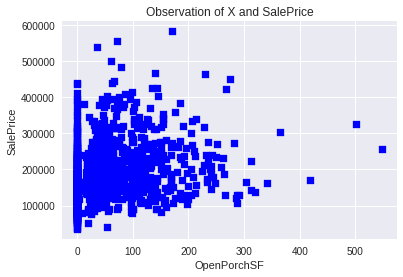

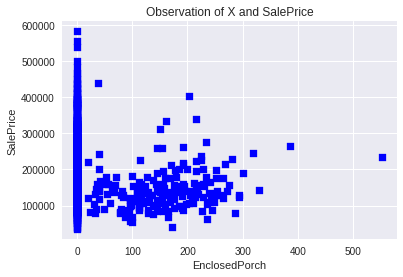

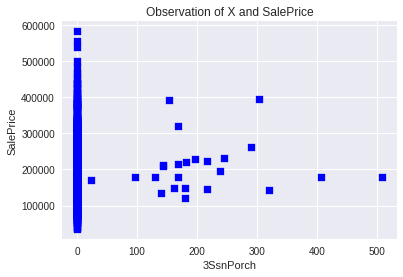

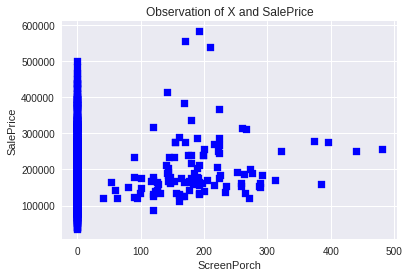

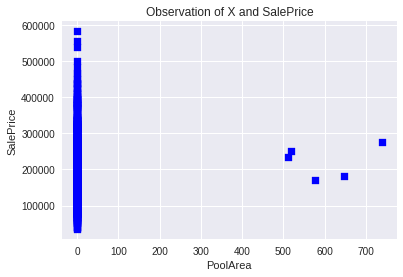

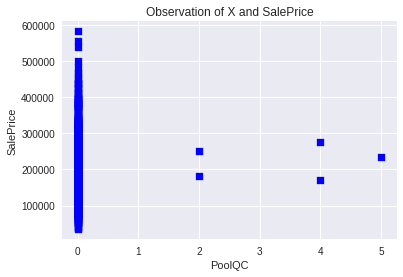

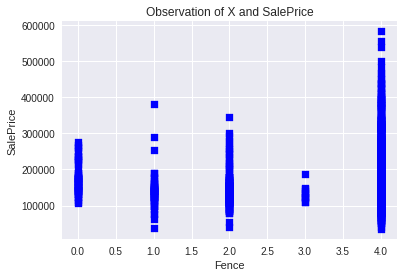

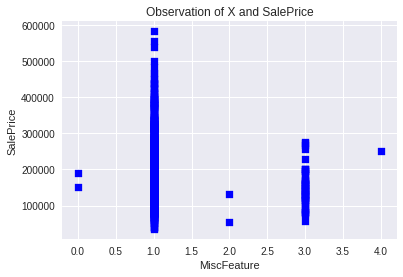

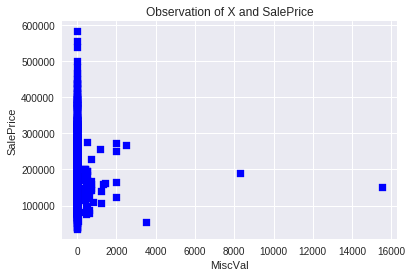

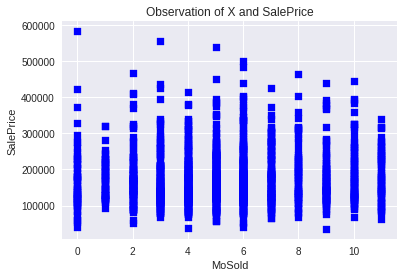

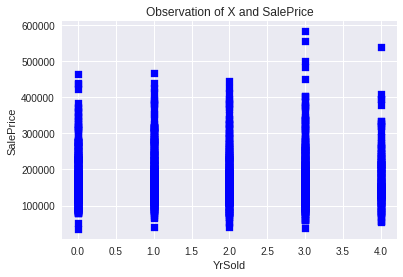

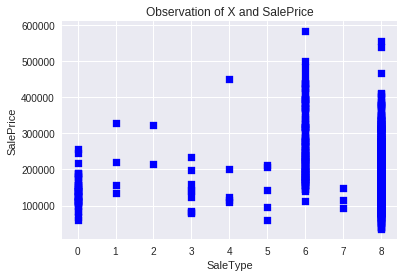

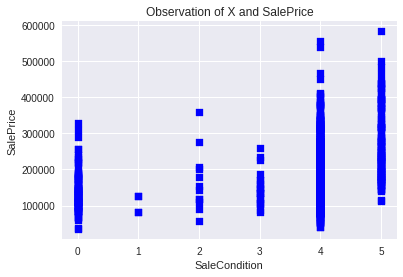

In [12]:
for i in df_train.columns:
    if i != 'SalePrice':
        data_observation(i,'SalePrice')

In [13]:
#Use this block to observe different features correlation
corrmat.nlargest(len(df_train),'Utilities')['SalePrice']

Utilities        0.014317
SaleType        -0.054878
Electrical       0.234990
SaleCondition    0.213121
MoSold           0.046380
LotFrontage      0.209692
YearRemodAdd     0.507430
LotConfig       -0.067335
MasVnrType       0.018262
Exterior2nd      0.103874
Exterior1st      0.103658
FullBath         0.560881
LotShape        -0.267726
MSSubClass      -0.054661
BsmtFinSF1       0.368806
BsmtFullBath     0.227082
2ndFlrSF         0.319464
HalfBath         0.284400
WoodDeckSF       0.324422
ExterQual        0.682677
BsmtExposure     0.361843
GarageYrBlt      0.527901
BsmtQual         0.585349
Foundation       0.382671
SalePrice        1.000000
TotalBsmtSF      0.613905
RoofStyle        0.222369
YearBuilt        0.535346
BsmtUnfSF        0.214446
BldgType        -0.085644
                   ...   
BedroomAbvGr     0.168235
LandSlope       -0.051127
Functional       0.107649
GarageArea       0.623423
GarageType       0.415266
GarageQual       0.273879
CentralAir       0.251367
GarageCond  

# Categorical data part

## Wrap categorical data first

- group 1 : MSSubClass: The building class + BldgType: Type of dwelling + HouseStyle: Style of dwelling
- group 2 : MSZoning: The general zoning classification
- group 3 : Street: Type of road access + Alley: Type of alley access
- group 4 : LotShape: General shape of property + LandContour: Flatness of the property +LotConfig: Lot configuration + LandSlope: Slope of property
- group 5 : Utilities: Type of utilities available + SaleType: Type of sale + SaleCondition: Condition of sale
- group 6 : Neighborhood: Physical locations within Ames city limits 
- group 7 : Condition1 + Condition2 + PavedDrive: Paved driveway
- group 8 : OverallQual: Overall material and finish quality + OverallCond: Overall condition rating
- group 9 : YearBuilt: Original construction date + YearRemodAdd: Remodel date + Functional: Home functionality rating 
- group 10 : RoofStyle: Type of roof + RoofMatl: Roof material
- group 11 : Exterior1st: Exterior covering on house + Exterior2nd: Exterior covering on house (if more than one material)
- group 12 : MasVnrType: Masonry veneer 
- group 13 : ExterQual: Exterior material quality + ExterCond: Present condition of the material on the exterior 
- group 14 : Foundation: Type of foundation
- group 15 : BsmtQual: Height of the basement + BsmtCond: General condition of the basement + BsmtExposure: Walkout or garden level basement walls + BsmtFinType1: Quality of basement finished area + BsmtFinType2: Quality of second finished area (if present)
- group 16 : Heating: Type of heating + HeatingQC: Heating quality and condition + CentralAir: Central air conditioning + Electrical: Electrical system
- group 17 : LowQualFinSF: Low quality finished square feet (all floors)
- group 18 : BsmtFullBath: Basement full bathrooms + BsmtHalfBath: Basement half bathrooms + FullBath: Full bathrooms above grade + HalfBath: Half baths above grade + BedroomAbvGr: Number of bedrooms above basement level
- group 19 : Fireplaces: Number of fireplaces + FireplaceQu: Fireplace quality
- group 20 : GarageType: Garage location + GarageYrBlt: Year garage was built + GarageFinish: Interior finish of the garage + GarageCars: Size of garage in car capacity + GarageQual: Garage quality + GarageCond: Garage condition
- group 21 : PoolQC: Pool quality + Fence: Fence quality + MiscFeature: Miscellaneous feature not covered in other categories 
- group 22 : MoSold: Month Sold + YrSold: Year Sold + SaleType: Type of sale + SaleCondition: Condition of sale

In [14]:
def normalize(feature):
    return (df_train[feature]-min(df_train[feature]))/max(df_train[feature])

group_1 = normalize('MSSubClass')+normalize('BldgType')+normalize('HouseStyle')
group_1 = group_1/3

group_2 = normalize('MSZoning')

group_3 = normalize('Street')+normalize('Alley')
group_3 = group_3/2

group_4 = normalize('LotShape')+normalize('LandContour')+normalize('LotConfig')+normalize('LandSlope')
group_4 = group_4/4

group_5 = normalize('Utilities')+normalize('SaleType')+normalize('SaleCondition')
group_5 = group_5/3

group_6 = normalize('Neighborhood')

group_7 = normalize('Condition1')+normalize('Condition2')+normalize('PavedDrive')
group_7 = group_7/3

group_8 = normalize('OverallQual')+normalize('OverallCond')
group_8 = group_8/2

group_9 = normalize('YearBuilt')+normalize('YearRemodAdd')+normalize('Functional')
group_9 = group_9/3

group_10 = normalize('RoofStyle')

group_11 = normalize('Exterior1st')+normalize('Exterior2nd')
group_11 = group_11/2

group_12 = normalize('MasVnrType')

group_13 = normalize('ExterQual')+normalize('ExterCond')
group_13 = group_13/2

group_14 = normalize('Foundation')

group_15 = normalize('BsmtQual')+normalize('BsmtCond')+normalize('BsmtExposure')+normalize('BsmtFinType1')+normalize('BsmtFinType2')
group_15 = group_15/5

group_16 = normalize('Heating')+normalize('HeatingQC')+normalize('CentralAir')+normalize('Electrical')
group_16 = group_16/4

group_17 = normalize('LowQualFinSF')

group_18 = normalize('BsmtFullBath')+normalize('BsmtHalfBath')+normalize('FullBath')+normalize('HalfBath')+normalize('BedroomAbvGr')
group_18 = group_18/5

group_19 = normalize('Fireplaces')+normalize('FireplaceQu')
group_19 = group_19/2

group_20 = normalize('GarageType')+normalize('GarageYrBlt')+normalize('GarageFinish')+normalize('GarageCars')+normalize('GarageQual')+normalize('GarageCond')
group_20 = group_20/6

group_21 = normalize('PoolQC')+normalize('Fence')+normalize('MiscFeature')
group_21 = group_21/3

group_22 = normalize('MoSold')+normalize('YrSold')+normalize('SaleType')+normalize('SaleCondition')
group_22 = group_22/4



In [15]:
#Create new X_data

Cat_train = pd.concat([group_1,group_2,group_3,group_4,group_5,group_6,group_7,group_8,group_9,group_10,group_11,group_12
               ,group_13,group_14,group_15,group_16,group_17,group_18,group_19,group_20,group_21,group_22],axis=1)
Cat_train.columns = ['group_1','group_2','group_3','group_4','group_5','group_6','group_7','group_8','group_9','group_10','group_11','group_12'
               ,'group_13','group_14','group_15','group_16','group_17','group_18','group_19','group_20','group_21','group_22']

## Numerical data

In [16]:
# search for normality
from scipy.stats import norm
import scipy.stats as stats

def Normal_observe(feature):
    sns.distplot(df_train[feature],fit=norm)
    fig = plt.figure()
#  res = stats.probplot(df_train[feature],plot=plt)

# for feature in df_train.columns:
#     Normal_observe(feature)

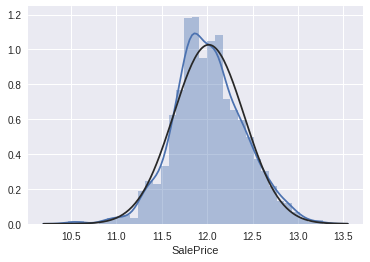

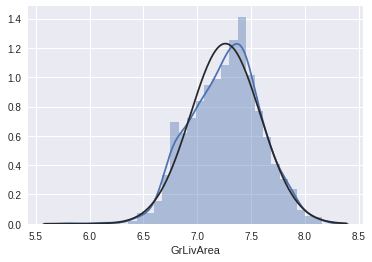

In [17]:
# Log tranformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])
Normal_observe('SalePrice')
Normal_observe('GrLivArea')

# Training and Tuning the model

In [18]:
# simple test model
from sklearn import linear_model
from sklearn.model_selection import KFold

def simple_linear_test(train_data,n_fold,feature_list):
    # use n-fold Cross validation 
    kf = KFold(n_fold).split(train_data)
    reg = linear_model.LinearRegression()
    part = 0
    total = 0
    y_train_data = train_data.loc[:,'SalePrice']
    X_train_data = train_data.drop('SalePrice',axis=1).loc[:,feature_list]
    for train_idx,test_idx in kf:
        print("TRAIN:", len(train_idx), "TEST:", len(test_idx))
        X_train, y_train = X_train_data.iloc[train_idx], y_train_data.iloc[train_idx]
        X_test, y_test = X_train_data.iloc[test_idx], y_train_data.iloc[test_idx]
        reg.fit(X_train,y_train)
        pred_test = reg.predict(X_test)
        part += 1
        pred_score = rmse(pred_test,y_test)
        total += pred_score
        print ("%d part RMSE: %.7f" % (part,pred_score))
    print ('Avg RMSE : ',total/n_fold) 

In [19]:
# use for categorical data
import xgboost as xgb

xgb = xgb.XGBRegressor(
                 colsample_bytree=0.8,
                 gamma=0.0,
                 learning_rate=0.01,
                 max_depth=6,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                  
                 reg_alpha=0.9,
                 reg_lambda=0.6,
                 subsample=0.8,
                 seed=42,
                 silent=False)
# create new training set by previous feature selection
# X_data = pd.concat([df_train['GrLivArea'],df_train['GarageArea'],df_train['TotalBsmtSF'],df_train['OverallQual'],df_train['FullBath'],df_train['Fireplaces'],df_train['YearBuilt'],df_train['YearRemodAdd']],axis=1)
# X_data = pd.concat([Cat_train,df_train['GrLivArea'],df_train['GarageArea'],df_train['MasVnrArea'],df_train['LotArea'],df_train['LotFrontage'],df_train['BsmtFinSF1'],df_train['BsmtFinSF2'],
#                     df_train['BsmtUnfSF'],df_train['TotalBsmtSF'],df_train['1stFlrSF'],df_train['2ndFlrSF']],axis=1)
X_data = Cat_train
y_data = df_train['SalePrice']
#split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data,y_data,test_size=0.2,random_state=0)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
print("XGBoost score on training set: ", rmse(y_test, y_pred))

/home/bill9800/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


XGBoost score on training set:  0.151859877488


# Prepare output data for Kaggle competition

In [20]:
#input the data
df_test = pd.read_csv('test.csv')

In [21]:
df_test_null = df_test.isnull().sum()
df2 = pd.DataFrame()
for idx_num in range(len(df_test_null)):
    if df_test_null.values[idx_num] != 0:
        df_temp = pd.DataFrame(index = [df_test_null.index[idx_num]],data = [df_test_null.values[idx_num]])
        df2 = df2.append(df_temp)
print (df2)

                 0
MSZoning         4
LotFrontage    227
Alley         1352
Utilities        2
Exterior1st      1
Exterior2nd      1
MasVnrType      16
MasVnrArea      15
BsmtQual        44
BsmtCond        45
BsmtExposure    44
BsmtFinType1    42
BsmtFinSF1       1
BsmtFinType2    42
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
BsmtFullBath     2
BsmtHalfBath     2
KitchenQual      1
Functional       2
FireplaceQu    730
GarageType      76
GarageYrBlt     78
GarageFinish    78
GarageCars       1
GarageArea       1
GarageQual      78
GarageCond      78
PoolQC        1456
Fence         1169
MiscFeature   1408
SaleType         1


## Handle the missing data

In [22]:
# Alley : NA means no alley, so change it to 'None'
df_test.loc[:,'Alley'] = df_test.loc[:,'Alley'].fillna('None')
# FireplaceQu : NA means no Fireplace
df_test.loc[:,'FireplaceQu'] = df_test.loc[:,'FireplaceQu'].fillna('None')
# PoolQC : NA means no pool
df_test.loc[:,'PoolQC'] = df_test.loc[:,'PoolQC'].fillna('None')
# Fence : NA means no fence
df_test.loc[:,'Fence'] = df_test.loc[:,'Fence'].fillna('None')
# MiscFeature : NA means no feature, and its MiscVal should be 0
df_test.loc[:,'MiscFeature'] = df_test.loc[:,'MiscFeature'].fillna('None')
## LotFrontage : make it 0 first
df_test.loc[:,'LotFrontage'] = df_test.loc[:,'LotFrontage'].fillna(0)
## MasVnrType : NaN most likely to be None, make it None first
df_test.loc[:,'MasVnrType'] = df_test.loc[:,'MasVnrType'].fillna('None')
## MasVnrArea : NaN is the same with MasVnrType, make it 0 first
df_test.loc[:,'MasVnrArea'] = df_test.loc[:,'MasVnrArea'].fillna(0)
# BsmtQual : NA means no basement 
df_test.loc[:,'BsmtQual'] = df_test.loc[:,'BsmtQual'].fillna('None')
# BsmtCond : NA means no basement
df_test.loc[:,'BsmtCond'] = df_test.loc[:,'BsmtCond'].fillna('None')
# BsmtExposure : NA means no basement, but index 948 is strange, based on other data with unfinished basement, the Nan is mostly 'No'
df_test.loc[:,'BsmtExposure'] = df_test.loc[:,'BsmtExposure'].fillna('None')
# BsmtFinType1 : NA means no basement
df_test.loc[:,'BsmtFinType1'] = df_test.loc[:,'BsmtFinType1'].fillna('None')
# BsmtFinType2 : NA means no basement
df_test.loc[:,'BsmtFinType2'] = df_test.loc[:,'BsmtFinType2'].fillna('None')
# Electrical : only one NA, and hard to interpret, just drop the data
df_test = df_test[df_test['Electrical'].notnull()]
# GarageType, GarageYrBlt,GarageFinish,GarageQual,GarageCond : NA means no garage
df_test.loc[:,'GarageType'] = df_test.loc[:,'GarageType'].fillna('None')
df_test.loc[:,'GarageFinish'] = df_test.loc[:,'GarageFinish'].fillna('None')
df_test.loc[:,'GarageQual'] = df_test.loc[:,'GarageQual'].fillna('None')
df_test.loc[:,'GarageCond'] = df_test.loc[:,'GarageCond'].fillna('None')
## Tansfer GarageYrBlt later, fill in 0 first, then deal with it 
df_test.loc[:,'GarageYrBlt'] = df_test.loc[:,'GarageYrBlt'].fillna(0)

## more special transfer for test data
df_test.loc[:,'MSZoning'] = df_test.loc[:,'MSZoning'].fillna('I')
df_test.loc[:,'Utilities'] = df_test.loc[:,'Utilities'].fillna('AllPub')
df_test.loc[:,'Exterior1st'] = df_test.loc[:,'Exterior1st'].fillna('Stone')
df_test.loc[:,'Exterior2nd'] = df_test.loc[:,'Exterior2nd'].fillna('Stucco')
df_test.loc[:,'BsmtFinSF1'] = df_test.loc[:,'BsmtFinSF1'].fillna(201)
df_test.loc[:,'BsmtFinSF2'] = df_test.loc[:,'BsmtFinSF2'].fillna(46)
df_test.loc[:,'BsmtUnfSF'] = df_test.loc[:,'BsmtUnfSF'].fillna(566.17)
df_test.loc[:,'BsmtFullBath'] = df_test.loc[:,'BsmtFullBath'].fillna(0)
df_test.loc[:,'BsmtHalfBath'] = df_test.loc[:,'BsmtHalfBath'].fillna(0)
df_test.loc[:,'KitchenQual'] = df_test.loc[:,'KitchenQual'].fillna('TA')
df_test.loc[:,'Functional'] = df_test.loc[:,'Functional'].fillna('Sal')
df_test.loc[:,'GarageCars'] = df_test.loc[:,'GarageCars'].fillna(2)
df_test.loc[:,'GarageArea'] = df_test.loc[:,'GarageYrBlt'].fillna(470.83)
df_test.loc[:,'SaleType'] = df_test.loc[:,'GarageYrBlt'].fillna('ConLD')
df_test.loc[:,'TotalBsmtSF'] = df_test.loc[:,'TotalBsmtSF'].fillna(1047.64)

In [23]:
# make sure not null points
df_test_null = df_test.isnull().sum()
df2 = pd.DataFrame()
for idx_num in range(len(df_test_null)):
    if df_test_null.values[idx_num] != 0:
        df_temp = pd.DataFrame(index = [df_test_null.index[idx_num]],data = [df_test_null.values[idx_num]])
        df2 = df2.append(df_temp)
print (df2)

Empty DataFrame
Columns: []
Index: []


## Preprocessing

In [24]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

def apply_label_encoder(data,feature_name):
    le.fit(df_test[feature_name])
    data[feature_name] = le.transform(data[feature_name])

labelEncoder_list = ['MSSubClass','MSZoning','Street','Alley','LandContour','LotConfig','Neighborhood','Condition1',
'Condition2','BldgType','HouseStyle','YearBuilt','YearRemodAdd','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea',
'Foundation','BsmtFinSF1','Heating','CentralAir','Electrical','GarageYrBlt','Fence','MiscFeature','MoSold','YrSold','SaleType','SaleCondition']
for feature in labelEncoder_list:
    apply_label_encoder(df_test,feature)


def apply_qualify_encoder(data,feature_name):
    return data.replace({feature_name:{"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5}})

qual_labelEncoder_list = ['ExterCond','ExterQual','HeatingQC','KitchenQual','BsmtQual','BsmtCond','FireplaceQu','GarageCond','GarageQual','PoolQC']    
for feature in qual_labelEncoder_list:
    df_test = apply_qualify_encoder(df_test,feature)
    
#special one
df_test = df_test.replace({"BsmtExposure" : {"None" : 0,"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                  "BsmtFinType1" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
                  "BsmtFinType2" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
                  "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                  "Min2" : 6, "Min1" : 7, "Typ" : 8},
                  "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                  "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                  "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                  "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4},
                  "GarageFinish": {"None" : 0, "Unf":1, "RFn":2,"Fin":3},
                  "GarageType" : {"None":0, "Detchd":1, "CarPort":2, "BuiltIn":3, "Basment":4, "Attchd":5,"2Types":6}})

In [25]:
# apply same rule like the training data
def normalize2(feature):
    return (df_test[feature]-min(df_test[feature]))/max(df_train[feature])

group2_1 = normalize2('MSSubClass')+normalize2('BldgType')+normalize2('HouseStyle')
group2_1 = group2_1/3

group2_2 = normalize2('MSZoning')

group2_3 = normalize2('Street')+normalize2('Alley')
group2_3 = group2_3/2

group2_4 = normalize2('LotShape')+normalize2('LandContour')+normalize2('LotConfig')+normalize2('LandSlope')
group2_4 = group2_4/4

group2_5 = normalize2('Utilities')+normalize2('SaleType')+normalize2('SaleCondition')
group2_5 = group2_5/3

group2_6 = normalize2('Neighborhood')

group2_7 = normalize2('Condition1')+normalize2('Condition2')+normalize2('PavedDrive')
group2_7 = group2_7/3

group2_8 = normalize2('OverallQual')+normalize2('OverallCond')
group2_8 = group2_8/2

group2_9 = normalize2('YearBuilt')+normalize2('YearRemodAdd')+normalize2('Functional')
group2_9 = group2_9/3

group2_10 = normalize2('RoofStyle')

group2_11 = normalize2('Exterior1st')+normalize2('Exterior2nd')
group2_11 = group2_11/2

group2_12 = normalize2('MasVnrType')

group2_13 = normalize2('ExterQual')+normalize2('ExterCond')
group2_13 = group2_13/2

group2_14 = normalize2('Foundation')

group2_15 = normalize2('BsmtQual')+normalize2('BsmtCond')+normalize2('BsmtExposure')+normalize2('BsmtFinType1')+normalize2('BsmtFinType2')
group2_15 = group2_15/5

group2_16 = normalize2('Heating')+normalize2('HeatingQC')+normalize2('CentralAir')+normalize2('Electrical')
group2_16 = group2_16/4

group2_17 = normalize2('LowQualFinSF')

group2_18 = normalize2('BsmtFullBath')+normalize2('BsmtHalfBath')+normalize2('FullBath')+normalize2('HalfBath')+normalize2('BedroomAbvGr')
group2_18 = group2_18/5

group2_19 = normalize2('Fireplaces')+normalize2('FireplaceQu')
group2_19 = group2_19/2

group2_20 = normalize2('GarageType')+normalize2('GarageYrBlt')+normalize2('GarageFinish')+normalize2('GarageCars')+normalize2('GarageQual')+normalize2('GarageCond')
group2_20 = group2_20/6

group2_21 = normalize2('PoolQC')+normalize2('Fence')+normalize2('MiscFeature')
group2_21 = group2_21/3

group2_22 = normalize2('MoSold')+normalize2('YrSold')+normalize2('SaleType')+normalize2('SaleCondition')
group2_22 = group2_22/4


In [26]:
X_Cat_test = pd.concat([group2_1,group2_2,group2_3,group2_4,group2_5,group2_6,group2_7,group2_8,group2_9,group2_10,group2_11,group2_12
               ,group2_13,group2_14,group2_15,group2_16,group2_17,group2_18,group2_19,group2_20,group2_21,group2_22],axis=1)
X_Cat_test.columns = ['group_1','group_2','group_3','group_4','group_5','group_6','group_7','group_8','group_9','group_10','group_11','group_12'
               ,'group_13','group_14','group_15','group_16','group_17','group_18','group_19','group_20','group_21','group_22']

## Numerical data

In [27]:
# Log tranformation
df_test['GrLivArea'] = np.log(df_test['GrLivArea'])

## Combine and output the data

In [28]:
X_data = X_Cat_test

y_pred_data = xgb.predict(X_data)
y_pred_data = np.exp(y_pred_data)

pd.DataFrame({'Id': df_test['Id'], 'SalePrice':y_pred_data}).to_csv('result.csv', index =False) 